Importing packages

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics
from tensorflow import keras

Importing datasets

11490434/11490434 [==============================] - 210s 18us/step
X_train shape =  (60000, 28, 28)  X_test shape =  (10000, 28, 28)


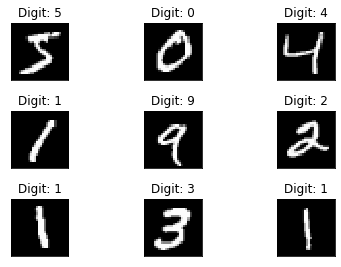

In [4]:
# Using Keras to load the dataset
# Every image is represented as a 28 × 28 array 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print("X_train shape = ",X_train.shape," X_test shape = ",X_test.shape)

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation="none")
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

# Scale the pixel intensities down to the [0,1] range by dividing them by 255.0 
# (this also converts them to floats).
X_train = X_train / 255.0
X_test  = X_test / 255.0

Building NN model

In [7]:
# Creating the model using the Sequential API
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# The model’s summary() method displays all the model’s layers
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 100)               30100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
Total params: 271,160
Trainable params: 271,160
Non-trainable params: 0
_________________________________________________________________
None


Training model

In [8]:
# Compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 0.9931 - accuracy: 0.7358 - val_loss: 0.4038 - val_accuracy: 0.8903
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3559 - accuracy: 0.8997 - val_loss: 0.3007 - val_accuracy: 0.9147
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2844 - accuracy: 0.9182 - val_loss: 0.2480 - val_accuracy: 0.9298
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2451 - accuracy: 0.9295 - val_loss: 0.2270 - val_accuracy: 0.9337
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2170 - accuracy: 0.9375 - val_loss: 0.2052 - val_accuracy: 0.9421
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1954 - accuracy: 0.9435 - val_loss: 0.1897 - val_accuracy: 0.9469
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1770 - accuracy: 0.9482 - val_loss: 0.1720 - val_accuracy: 0.9523
Epoch 

Evaluating model

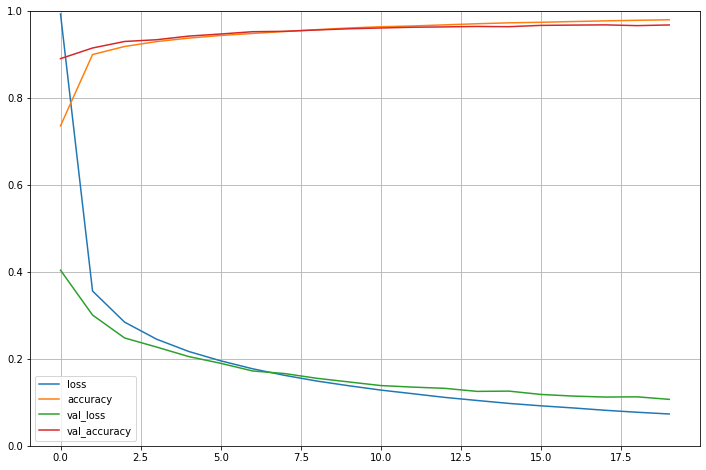

-----------------------------------------------------------------------
313/313 [==============================] - 1s 2ms/step - loss: 0.0985 - accuracy: 0.9697
Loss     :  0.09854786098003387
accuracy :  0.9696999788284302


In [9]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

print("-----------------------------------------------------------------------")
# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])